# Developing and Testing mortgage_app functions

In [ ]:
pwd

In [ ]:
run mortgage_app.py

In [ ]:
create_loan()

In [ ]:
loan_params

# Importing Developing and Testing mortgage class of functions

In [1]:
pwd

'/Users/alexeygilman/Repositories/Gilman_earning/mortgage_calculator'

In [2]:
run mortgage_class.py

In [3]:
loan_1 = Loan(750000,3.2,30)

In [4]:
loan_1.describe()

Loan principle: 750000
Loan annual interest (%) 3.2
Loan duration (Month) 360
Monthly payment ($) 3243.501489083747


<AxesSubplot:xlabel='Months'>

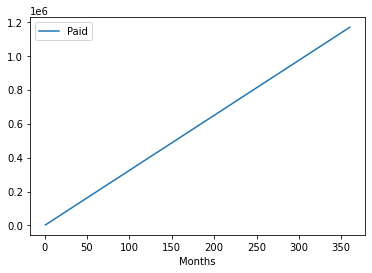

In [6]:
loan_1.schedule()

In [ ]:
loan_1.monthly()

# Converting Functions Into Classes Workflow

# Appendix

### Following along: creating Student Class

In [ ]:
my_student = {
    "name":"Rolf Smith",
    "grades":[70,88,90,99],
    "average":None
}

In [ ]:
def average_grade(student):
    return(sum(student["grades"])/len(student["grades"]))

In [ ]:
average_grade(my_student)

In [ ]:
class Student:
    def __init__(self, new_name, new_grades):
        self.name = new_name
        self.grades = new_grades
        
    def average(self):
        return sum(self.grades)/len(self.grades)

In [ ]:
student_one = Student("Rolf Smith", [70,88,90,99])

In [ ]:
student_one.name

In [ ]:
student_one.average()

### Following along, exploring dunder methods

In [ ]:
class Student:
    def __init__(self, name):
        self.name = name

In [ ]:
movies = ["Matrix", "Finding Nemo"]
print(movies.__class__)

In [ ]:
class Garage:
    def __init__(self):
        self.cars = []
     
    def __len__(self):
        return len(self.cars)

    def __getitem__(self, i):
        return self.cars[i]
        
    def __repr__(self):
        return f"<Garage {self.cars}>"

In [ ]:
ford = Garage()

In [ ]:
ford.cars.append("Fiesta")
ford.cars.append("Focus")

In [ ]:
print(ford.cars)

In [ ]:
print(ford[1])

In [ ]:
ford[0]

In [ ]:
ford.__repr__

In [ ]:
movies.__repr__

In [ ]:
print(ford)